In [3]:
def find_missing_non_vocab_questions(user_data, golden_data, df_user_clean, df_golden):
    """Find specific non-vocabulary questions that are missing from the analysis."""
    print("FINDING MISSING NON-VOCABULARY QUESTIONS")
    print("=" * 60)
    
    # Get the correct keys for both datasets
    user_stories_key = "stories" if "stories" in user_data else "texts"
    golden_stories_key = "stories" if "stories" in golden_data else "texts"
    
    print(f"Using user key: '{user_stories_key}'")
    print(f"Using golden key: '{golden_stories_key}'")
    
    # Extract all questions from raw data (both datasets)
    all_user_questions = set()
    all_golden_questions = set()
    
    # Get all user questions from raw data
    for story in user_data[user_stories_key]:
        title = story["title"]
        questions = story.get("questions", [])
        if not questions and "exercises" in story:
            for exercise in story["exercises"]:
                questions.extend(exercise.get("questions", []))
        
        for q in questions:
            q_text = q["question"].strip()
            # Only include non-vocabulary questions
            if "cosa significa" not in q_text.lower():
                all_user_questions.add((title, q_text))
    
    # Get all golden questions from raw data
    for story in golden_data[golden_stories_key]:
        title = story["title"]
        questions = story.get("questions", [])
        if not questions and "exercises" in story:
            for exercise in story["exercises"]:
                questions.extend(exercise.get("questions", []))
        
        for q in questions:
            q_text = q["question"].strip()
            # Only include non-vocabulary questions
            if "cosa significa" not in q_text.lower():
                all_golden_questions.add((title, q_text))
    
    # Get questions that made it into the cleaned DataFrames
    df_user_questions = set()
    for _, row in df_user_clean.iterrows():
        df_user_questions.add((row['title'], row['question']))
    
    df_golden_questions = set()
    for _, row in df_golden.iterrows():
        df_golden_questions.add((row['title'], row['question']))
    
    print(f"\nRAW DATA COUNTS (non-vocabulary only):")
    print(f"User questions in raw data: {len(all_user_questions)}")
    print(f"Golden questions in raw data: {len(all_golden_questions)}")
    
    print(f"\nPROCESSED DATAFRAME COUNTS:")
    print(f"User questions in cleaned DataFrame: {len(df_user_questions)}")
    print(f"Golden questions in DataFrame: {len(df_golden_questions)}")
    
    # Find questions that exist in raw data but missing from processed data
    user_missing_from_df = all_user_questions - df_user_questions
    golden_missing_from_df = all_golden_questions - df_golden_questions
    
    print(f"\nQUESTIONS LOST DURING PROCESSING:")
    if user_missing_from_df:
        print(f"User questions lost: {len(user_missing_from_df)}")
        for title, question in user_missing_from_df:
            print(f"  - {title}: {question[:80]}...")
    else:
        print("No user questions lost during processing")
    
    if golden_missing_from_df:
        print(f"Golden questions lost: {len(golden_missing_from_df)}")
        for title, question in golden_missing_from_df:
            print(f"  - {title}: {question[:80]}...")
    else:
        print("No golden questions lost during processing")
    
    # Find questions that exist in golden but not in user (the actual missing questions)
    missing_in_user_raw = all_golden_questions - all_user_questions
    missing_in_golden_raw = all_user_questions - all_golden_questions
    
    print(f"\nQUESTIONS MISSING BETWEEN DATASETS:")
    if missing_in_user_raw:
        print(f"Questions in golden but missing in user data: {len(missing_in_user_raw)}")
        for title, question in missing_in_user_raw:
            print(f"  ❌ {title}: {question}")
    else:
        print("✅ All golden questions found in user data")
    
    if missing_in_golden_raw:
        print(f"Questions in user but missing in golden data: {len(missing_in_golden_raw)}")
        for title, question in missing_in_golden_raw:
            print(f"  ⚠️  {title}: {question}")
    else:
        print("✅ All user questions found in golden data")
    
    # Find questions that can't be matched for analysis
    questions_in_analysis = df_user_questions & df_golden_questions
    user_questions_not_in_analysis = df_user_questions - questions_in_analysis
    golden_questions_not_in_analysis = df_golden_questions - questions_in_analysis
    
    print(f"\nQUESTIONS NOT INCLUDED IN ANALYSIS:")
    print(f"Questions successfully analyzed: {len(questions_in_analysis)}")
    
    if user_questions_not_in_analysis:
        print(f"User questions not analyzed: {len(user_questions_not_in_analysis)}")
        for title, question in user_questions_not_in_analysis:
            print(f"  - {title}: {question[:80]}...")
    
    if golden_questions_not_in_analysis:
        print(f"Golden questions not analyzed: {len(golden_questions_not_in_analysis)}")
        for title, question in golden_questions_not_in_analysis:
            print(f"  - {title}: {question[:80]}...")
    
    # Focus on Story 5 specifically
    print(f"\nSTORY 5 DETAILED ANALYSIS:")
    print("=" * 40)
    
    story_5_user_raw = {q for t, q in all_user_questions if "5" in t or t.startswith("Storia 5") or "quinta" in t.lower()}
    story_5_golden_raw = {q for t, q in all_golden_questions if "5" in t or t.startswith("Storia 5") or "quinta" in t.lower()}
    story_5_user_df = {q for t, q in df_user_questions if "5" in t or t.startswith("Storia 5") or "quinta" in t.lower()}
    story_5_golden_df = {q for t, q in df_golden_questions if "5" in t or t.startswith("Storia 5") or "quinta" in t.lower()}
    
    print(f"Story 5 - User questions (raw): {len(story_5_user_raw)}")
    print(f"Story 5 - Golden questions (raw): {len(story_5_golden_raw)}")
    print(f"Story 5 - User questions (processed): {len(story_5_user_df)}")
    print(f"Story 5 - Golden questions (processed): {len(story_5_golden_df)}")
    
    story_5_missing = story_5_golden_raw - story_5_user_raw
    if story_5_missing:
        print(f"\nStory 5 - Questions in golden but missing in user:")
        for question in story_5_missing:
            print(f"  ❌ {question}")
    
    return {
        'user_missing_from_df': user_missing_from_df,
        'golden_missing_from_df': golden_missing_from_df,
        'missing_in_user_raw': missing_in_user_raw,
        'missing_in_golden_raw': missing_in_golden_raw,
        'questions_in_analysis': questions_in_analysis,
        'user_questions_not_in_analysis': user_questions_not_in_analysis,
        'golden_questions_not_in_analysis': golden_questions_not_in_analysis
    }


Loading data...
Processing datasets...
Filtering data (removing vocabulary questions, keeping last attempts)...
Calculating accuracy...
Creating performance visualization...


/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_49170/3998379983.py:841: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


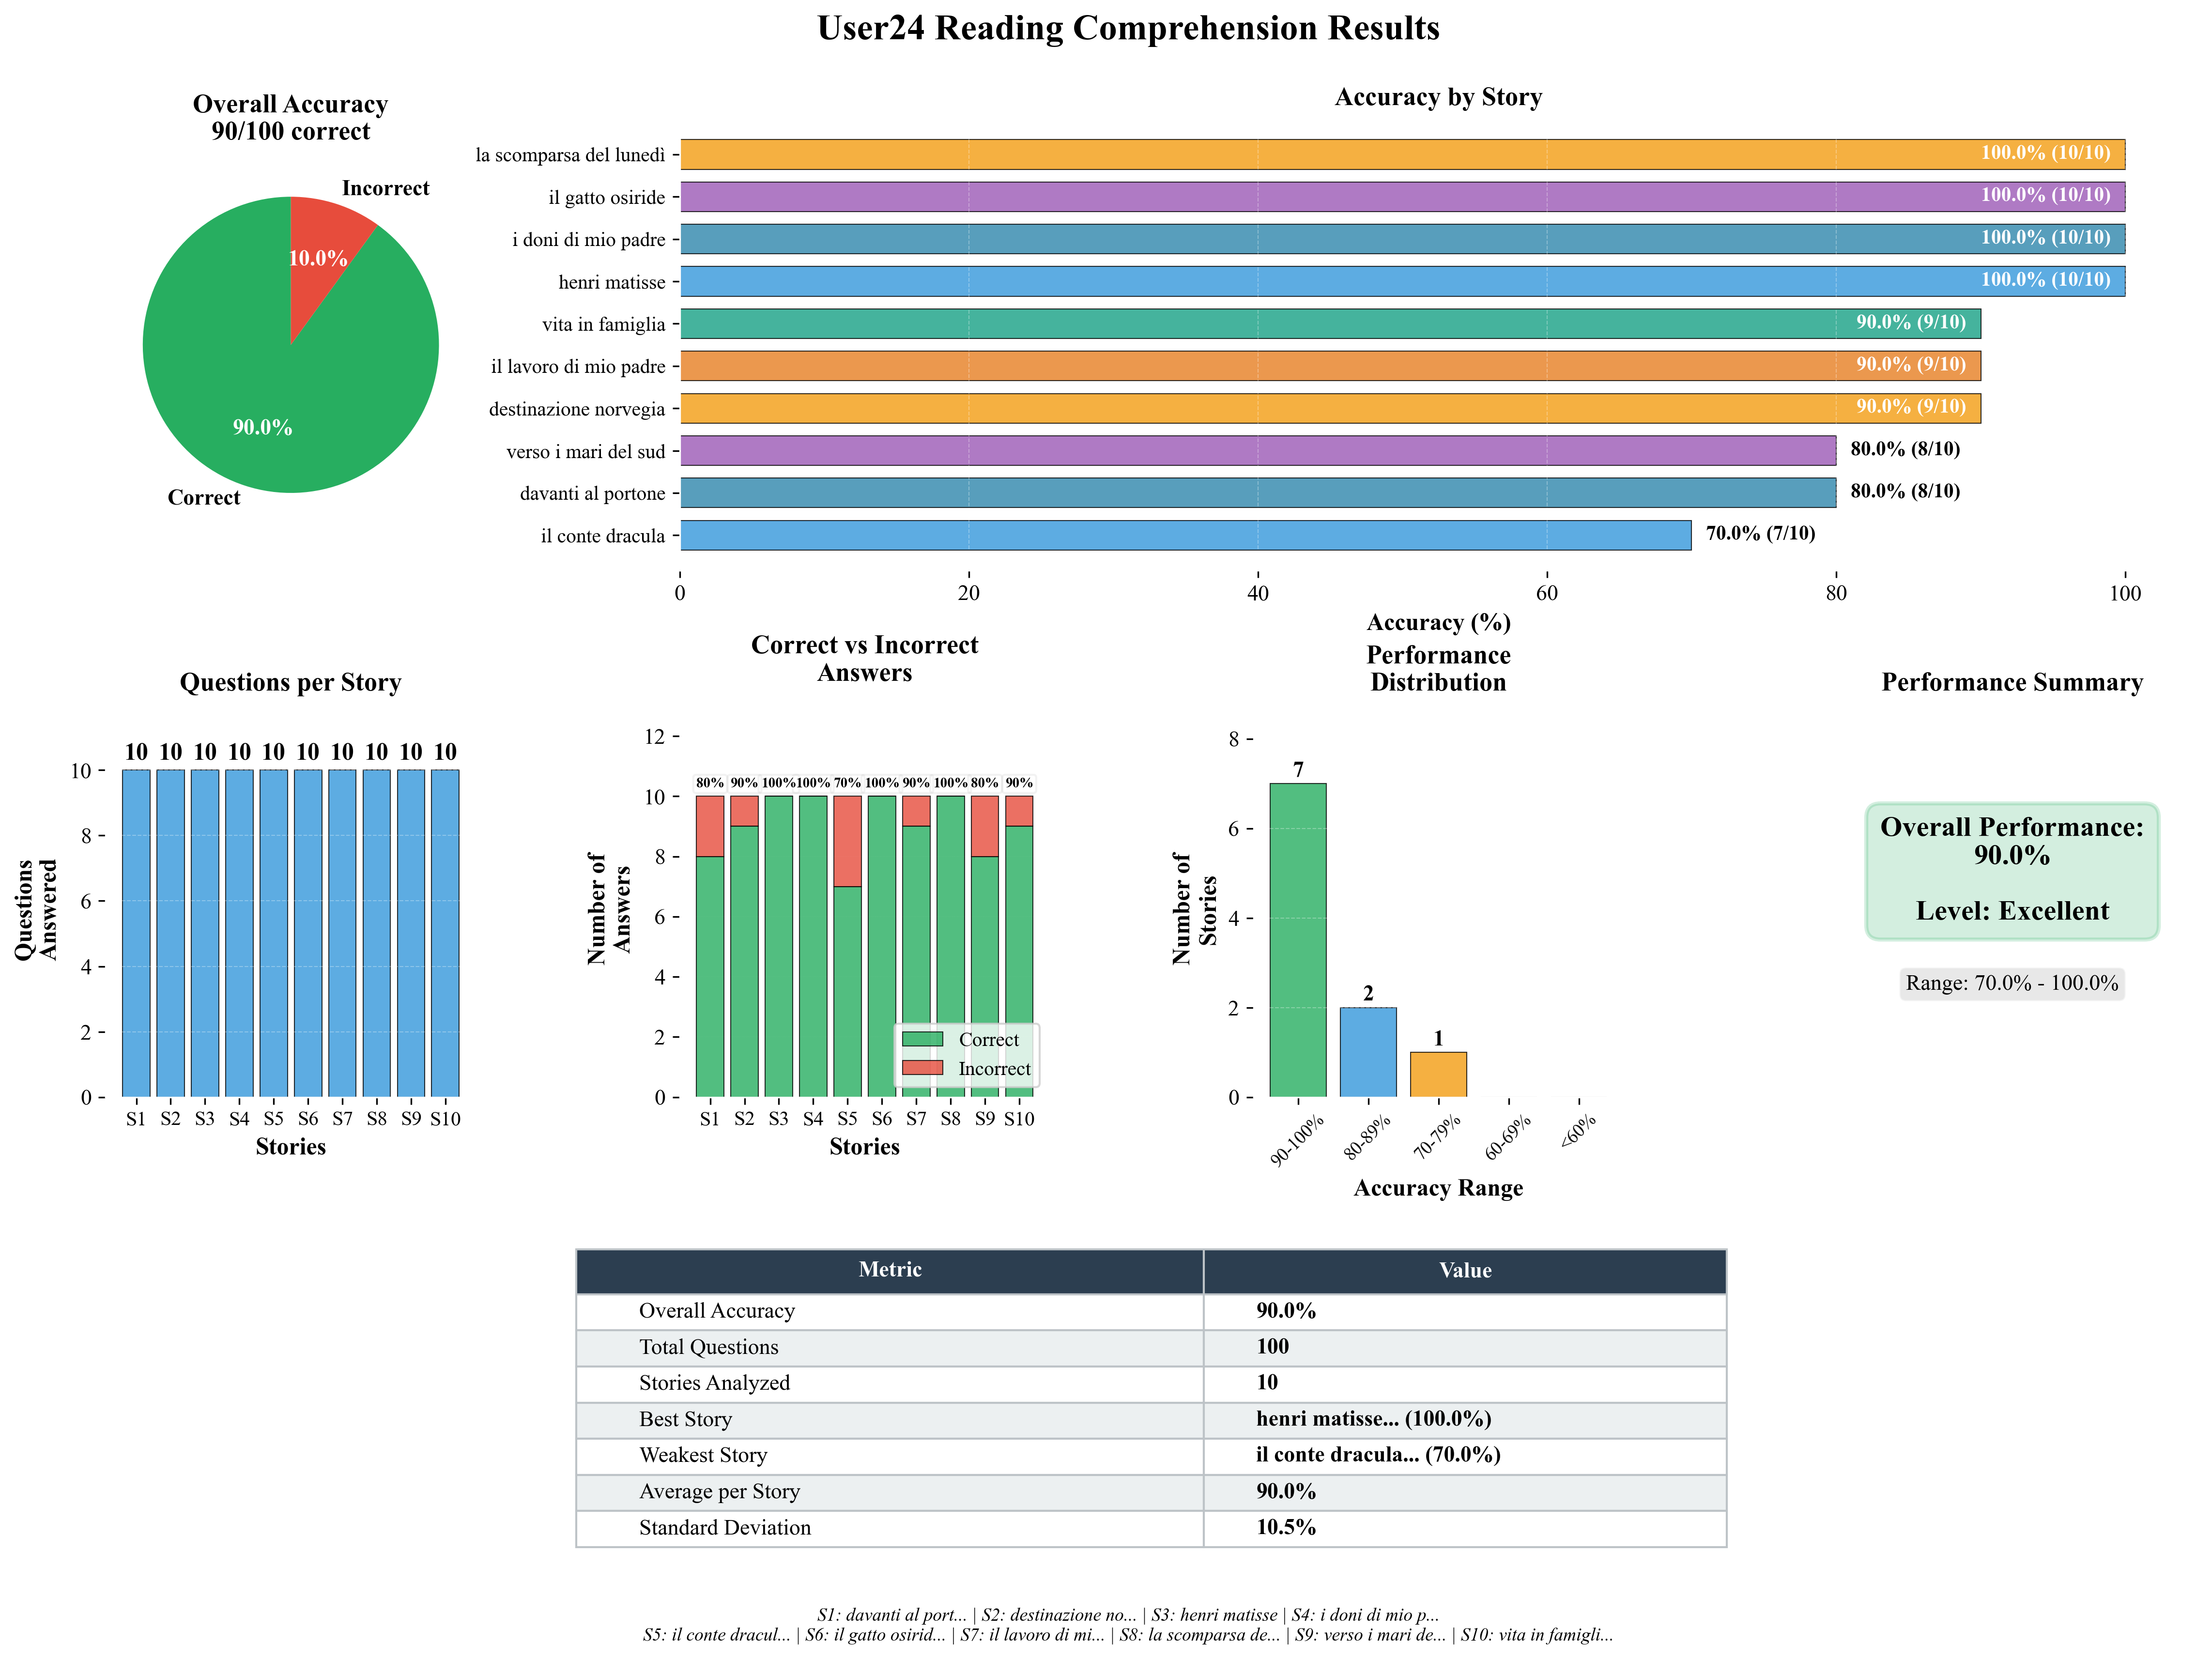

Generating summary...
USER24 PERFORMANCE ANALYSIS
Overall Accuracy: 90.0%
Questions Analyzed: 100
Stories Covered: 10
Question Coverage: 100/170 (58.8%)
Best Performance: 100.0% (henri matisse)
Lowest Performance: 70.0% (il conte dracula)

Story-by-Story Breakdown:
• davanti al portone: 8/10 (80.0%)
• destinazione norvegia: 9/10 (90.0%)
• henri matisse: 10/10 (100.0%)
• i doni di mio padre: 10/10 (100.0%)
• il conte dracula: 7/10 (70.0%)
• il gatto osiride: 10/10 (100.0%)
• il lavoro di mio padre: 9/10 (90.0%)
• la scomparsa del lunedì: 10/10 (100.0%)
• verso i mari del sud: 8/10 (80.0%)
• vita in famiglia: 9/10 (90.0%)

Preparing temporal analysis...

TEMPORAL ANALYSIS: IMPROVEMENT OVER TIME
Total attempts analyzed: 238
Date range: 2025-07-28 17:38:38 to 2025-10-06 15:34:35


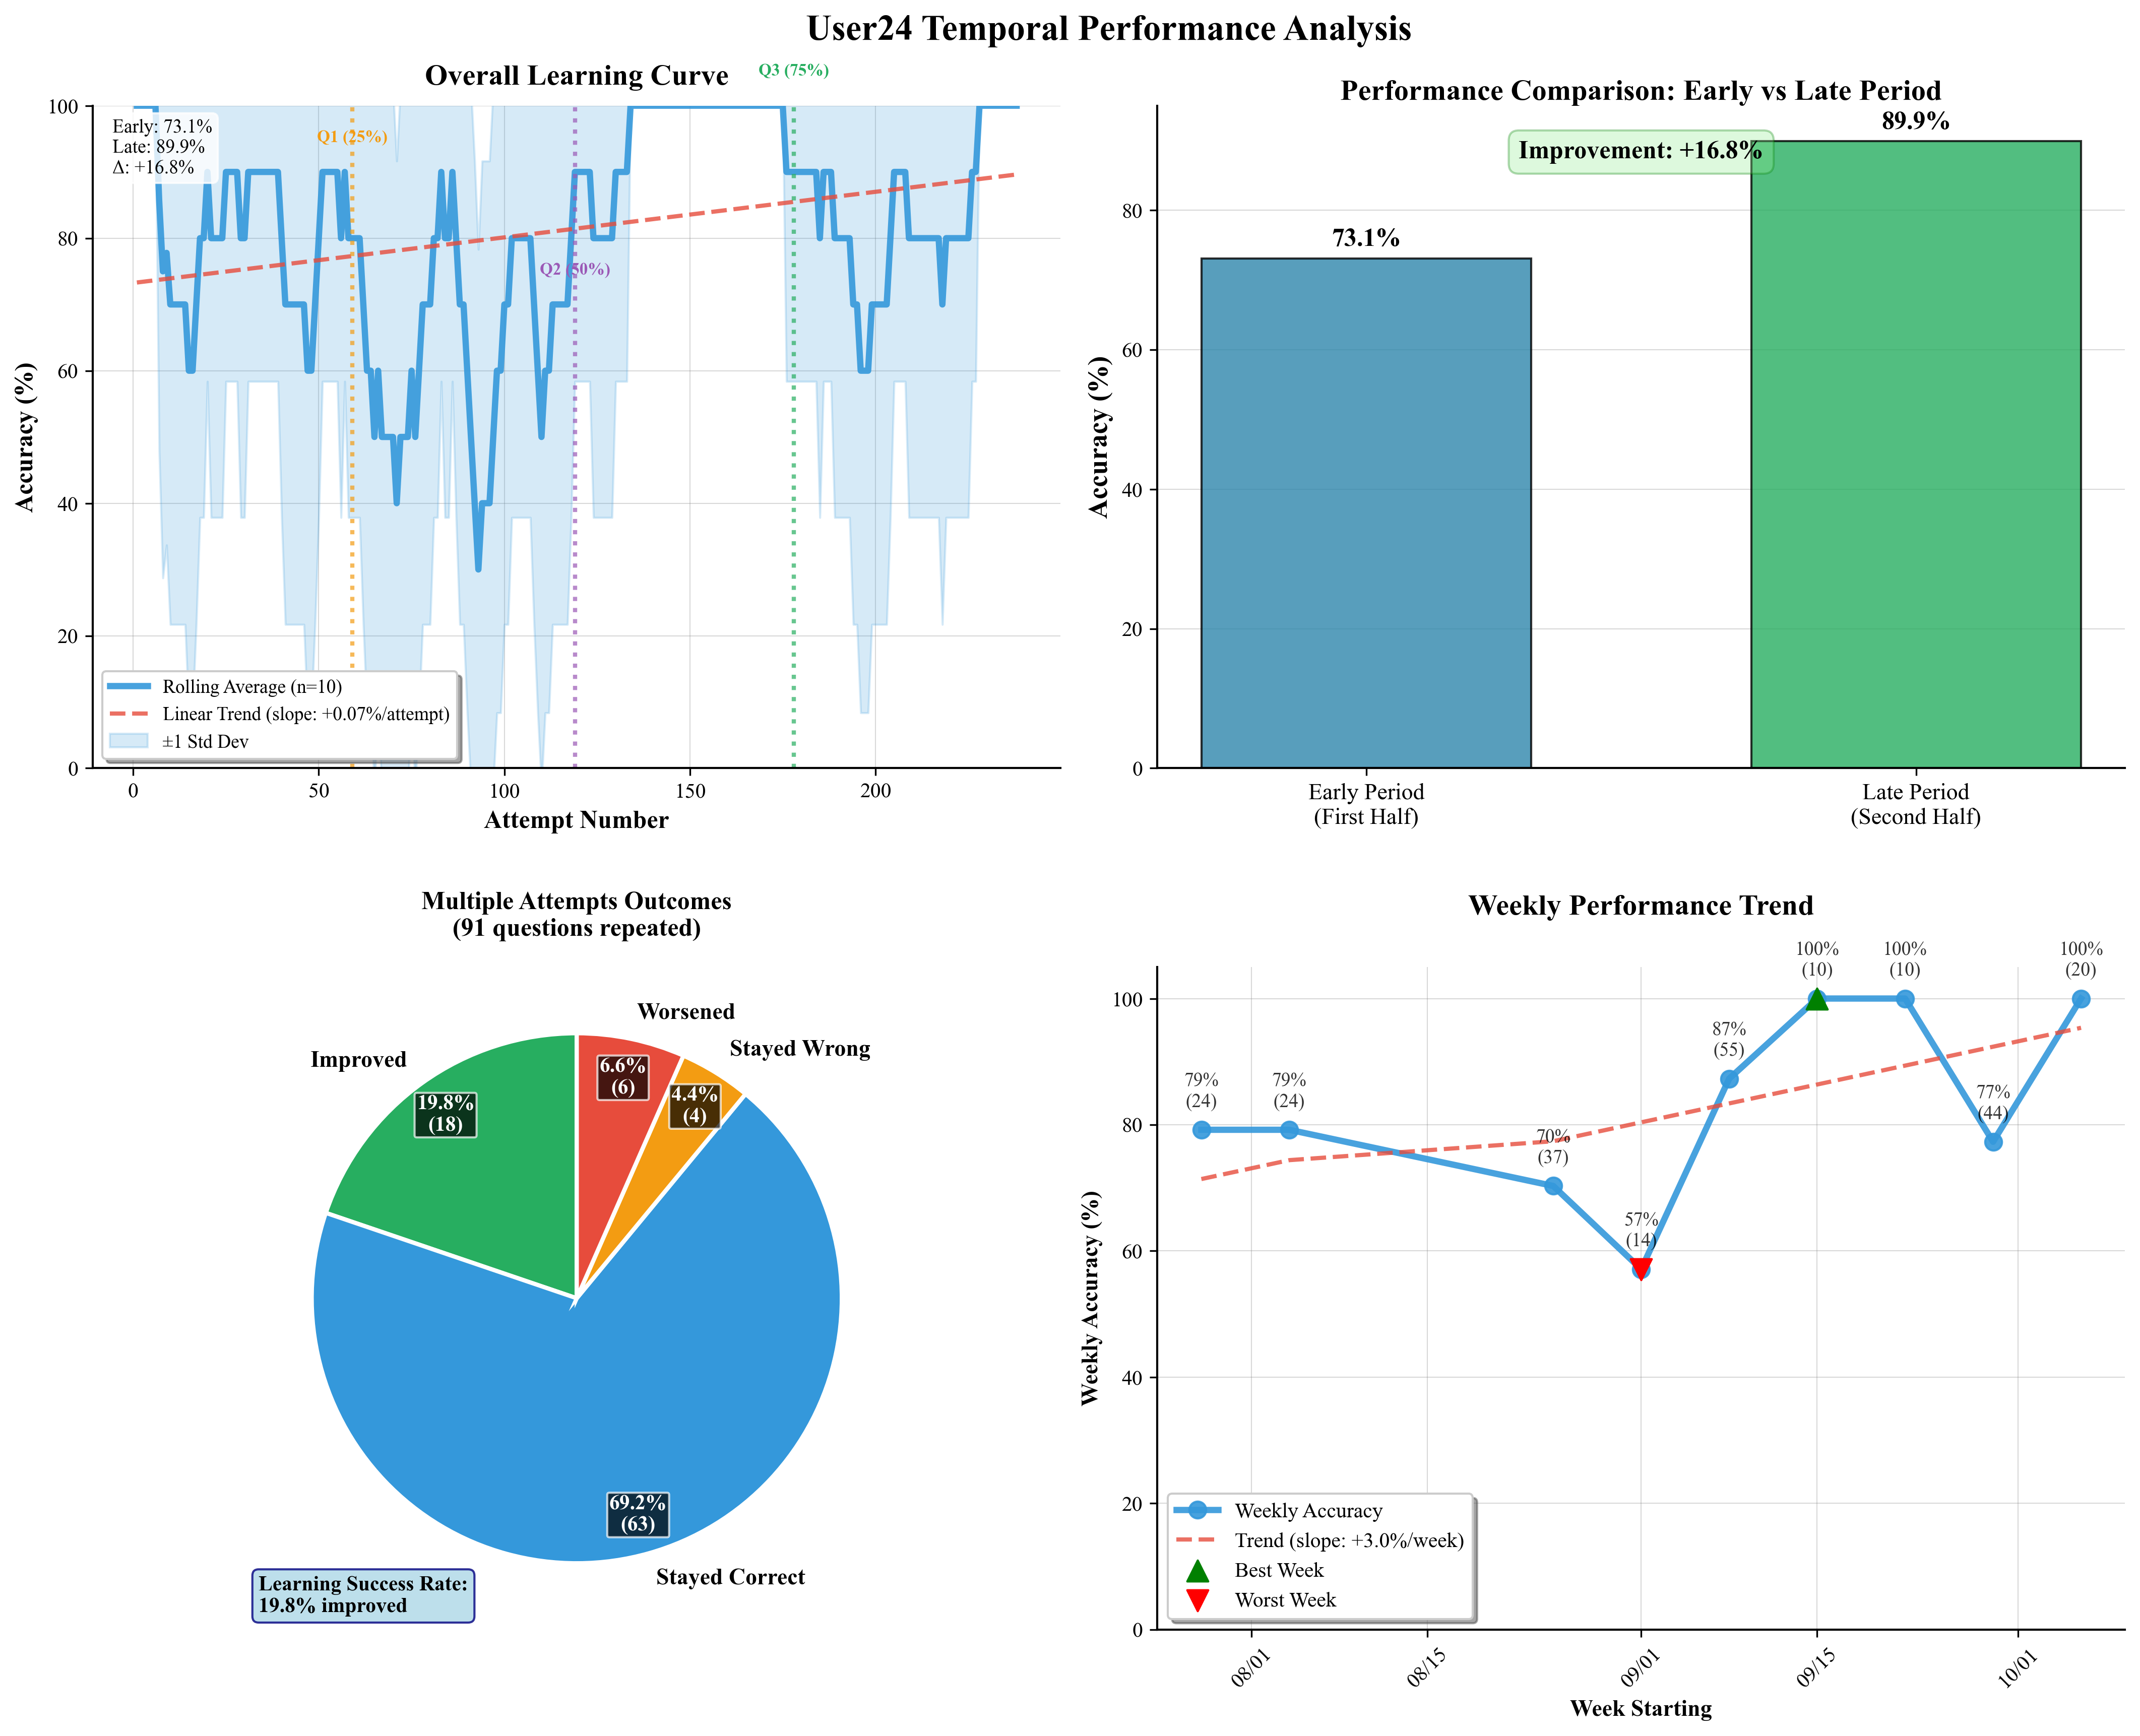


TEMPORAL STATISTICS:
First attempt date: 2025-07-28 17:38:38
Last attempt date: 2025-10-06 15:34:35
Total study period: 69 days
Total attempts: 238
Average attempts per day: 3.4

PERFORMANCE COMPARISON:
Early period accuracy (first 119 attempts): 73.1%
Late period accuracy (last 119 attempts): 89.9%
Improvement: +16.8 percentage points
✅ Significant improvement detected!

STORY-SPECIFIC TEMPORAL TRENDS:
verso i mari del sud: +9.1% change (22 attempts)
davanti al portone: -34.6% change (27 attempts)
destinazione norvegia: +0.0% change (22 attempts)
il conte dracula: -5.6% change (36 attempts)
il gatto osiride: +18.2% change (22 attempts)
i doni di mio padre: +50.0% change (24 attempts)
vita in famiglia: +37.1% change (23 attempts)
henri matisse: +20.0% change (11 attempts)
la scomparsa del lunedì: +0.0% change (30 attempts)
il lavoro di mio padre: -18.2% change (21 attempts)

MULTIPLE ATTEMPTS ANALYSIS:
Questions attempted multiple times: 91
Questions improved from wrong to right: 18/9

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np
import re
import csv
import os
from datetime import datetime

# Configure matplotlib for professional output
plt.rcParams.update({
    'font.size': 11,
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif', 'serif'],
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

def load_data():
    """Load and process user and golden datasets."""
    # Load datasets
    with open("/Users/Martina.Galletti/Downloads/dati-artis1/dati-json/risultati-user24.json", "r") as f:
        user_data = json.load(f)
    
    with open("/Users/Martina.Galletti/Downloads/dati-artis1/json-with-correct-answers/quinta-elementare_with_answers.json", "r") as f:
        golden_data = json.load(f)
    
    return user_data, golden_data

def process_user_data(user_data):
    """Process user data into DataFrame."""
    records = []
    
    # Handle both old (texts/exercises) and new (stories) structures
    stories_key = "stories" if "stories" in user_data else "texts"
    
    for story in user_data[stories_key]:
        title = story["title"]
        
        # Handle questions structure
        questions = story.get("questions", [])
        if not questions and "exercises" in story:
            # Old structure
            for exercise in story["exercises"]:
                questions.extend(exercise.get("questions", []))
        
        for q in questions:
            q_text = q["question"].strip()
            for ans in q.get("answers", []):
                start_time = ans["date"].split("->")[0].strip()
                date = datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S")
                records.append({
                    "title": title,
                    "question": q_text,
                    "answer": ans["result"].strip().lower(),
                    "date": date
                })
    
    return pd.DataFrame(records)

def process_golden_data(golden_data):
    """Process golden data into DataFrame."""
    records = []
    
    # Handle both structures
    stories_key = "stories" if "stories" in golden_data else "texts"
    
    for story in golden_data[stories_key]:
        title = story["title"]
        
        # Handle questions structure
        questions = story.get("questions", [])
        if not questions and "exercises" in story:
            # Old structure
            for exercise in story["exercises"]:
                questions.extend(exercise.get("questions", []))
        
        for q in questions:
            q_text = q["question"].strip()
            correct_answer = q.get("correct_answer", {}).get("text", "").strip().lower()
            records.append({
                "title": title,
                "question": q_text,
                "correct_answer": correct_answer
            })
    
    return pd.DataFrame(records)

def filter_data(df_user):
    """Filter out vocabulary questions and keep only last attempts."""
    # Remove vocabulary questions
    df_filtered = df_user[~df_user['question'].str.contains("Cosa significa", case=False, na=False)].copy()
    
    # Keep only last attempt for each question
    df_last = df_filtered.sort_values('date').groupby(['title', 'question']).tail(1).reset_index(drop=True)
    
    return df_last

def calculate_accuracy(df_user, df_golden):
    """Calculate accuracy metrics."""
    # Merge datasets
    merged_df = df_user.merge(df_golden, on=['title', 'question'], how='inner')
    
    if len(merged_df) == 0:
        return None, None
    
    # Calculate accuracy
    merged_df['is_correct'] = merged_df['answer'] == merged_df['correct_answer']
    
    # Overall accuracy
    overall_accuracy = merged_df['is_correct'].mean() * 100
    
    # Story-level accuracy
    story_accuracy = merged_df.groupby('title')['is_correct'].agg(['count', 'sum', 'mean'])
    story_accuracy.columns = ['total_answers', 'correct_answers', 'accuracy']
    story_accuracy['accuracy_pct'] = story_accuracy['accuracy'] * 100
    
    return merged_df, story_accuracy

def prepare_temporal_data(df_user, df_golden):
    """Prepare data for temporal analysis."""
    # Analyze ALL attempts (not just final answers) to see improvement
    df_user_all_attempts = df_user[~df_user['question'].str.contains("Cosa significa", case=False, na=False)].copy()
    
    # Merge with golden answers to get correctness for all attempts
    df_temporal = df_user_all_attempts.merge(df_golden, on=['title', 'question'], how='inner')
    df_temporal['is_correct'] = df_temporal['answer'] == df_temporal['correct_answer']
    
    # Sort by date for temporal analysis
    df_temporal = df_temporal.sort_values('date')
    
    return df_temporal

def create_temporal_plot(df_temporal):
    """Create comprehensive temporal performance visualization."""
    print("\nTEMPORAL ANALYSIS: IMPROVEMENT OVER TIME")
    print("=" * 60)
    print(f"Total attempts analyzed: {len(df_temporal)}")
    print(f"Date range: {df_temporal['date'].min()} to {df_temporal['date'].max()}")
    
    # Set professional plotting parameters
    plt.rcParams.update({
        'font.size': 12,
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'DejaVu Serif', 'serif'],
        'axes.linewidth': 1.0,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.edgecolor': 'black',
        'axes.labelcolor': 'black',
        'axes.axisbelow': True,
        'xtick.bottom': True,
        'ytick.left': True,
        'xtick.color': 'black',
        'ytick.color': 'black',
        'text.color': 'black',
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'savefig.facecolor': 'white',
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'savefig.bbox': 'tight',
        'grid.alpha': 0.3,
        'grid.color': 'gray'
    })
    
    # Calculate daily accuracy
    df_temporal['date_only'] = df_temporal['date'].dt.date
    daily_stats = df_temporal.groupby('date_only').agg({
        'is_correct': ['count', 'sum', 'mean']
    }).round(3)
    daily_stats.columns = ['total_attempts', 'correct_attempts', 'daily_accuracy']
    daily_stats['daily_accuracy_pct'] = daily_stats['daily_accuracy'] * 100
    
    # Create the temporal analysis plot
    fig = plt.figure(figsize=(16, 12), facecolor='white')
    
    # Create grid layout
    gs = fig.add_gridspec(2, 2, 
                         height_ratios=[1, 1], 
                         width_ratios=[1, 1],
                         hspace=0.3, 
                         wspace=0.1,
                         top=0.92,
                         bottom=0.08,
                         left=0.08,
                         right=0.92)
    
    # Professional color palette
    colors_comparison = ['#2E86AB', '#27AE60']
    colors_pie = ['#27AE60', '#3498DB', '#E74C3C', '#F39C12']
    
    # 1. Overall Learning Curve (top left)
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Create overall learning curve with attempt sequence
    attempt_numbers = np.arange(1, len(df_temporal) + 1)
    rolling_window = min(10, len(df_temporal) // 4)  # Adaptive window size
    rolling_acc = df_temporal['is_correct'].rolling(window=rolling_window, min_periods=1).mean() * 100
    
    # Plot overall learning curve
    ax1.plot(attempt_numbers, rolling_acc, color='#3498DB', linewidth=3, alpha=0.9,
             label=f'Rolling Average (n={rolling_window})')
    
    # Add overall trend line
    if len(attempt_numbers) > 5:
        z = np.polyfit(attempt_numbers, rolling_acc, 1)
        p = np.poly1d(z)
        trend_line = p(attempt_numbers)
        ax1.plot(attempt_numbers, trend_line, "--", color='#E74C3C', alpha=0.8, linewidth=2,
                 label=f'Linear Trend (slope: {z[0]:+.2f}%/attempt)')
    
    # Highlight performance quartiles
    quartile_points = [len(attempt_numbers)//4, len(attempt_numbers)//2, 3*len(attempt_numbers)//4]
    quartile_colors = ['#F39C12', '#9B59B6', '#27AE60']
    quartile_labels = ['Q1 (25%)', 'Q2 (50%)', 'Q3 (75%)']
    
    for i, (point, color, label) in enumerate(zip(quartile_points, quartile_colors, quartile_labels)):
        if point < len(rolling_acc):
            ax1.axvline(x=point, color=color, linestyle=':', alpha=0.7, linewidth=2)
            ax1.text(point, rolling_acc.iloc[point-5] + 4, label, 
                    ha='center', va='bottom', fontsize=8, color=color, fontweight='bold')
    
    # Add confidence band (standard deviation)
    rolling_std = df_temporal['is_correct'].rolling(window=rolling_window, min_periods=1).std() * 100
    ax1.fill_between(attempt_numbers, rolling_acc - rolling_std, rolling_acc + rolling_std,
                    alpha=0.2, color='#3498DB', label='±1 Std Dev')
    
    ax1.set_xlabel('Attempt Number', fontweight='bold', fontsize=12)
    ax1.set_ylabel('Accuracy (%)', fontweight='bold', fontsize=12)
    ax1.set_title('Overall Learning Curve', fontsize=14, fontweight='bold', pad=10)
    ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax1.set_ylim(0, 100)
    ax1.legend(fontsize=9, frameon=True, fancybox=True, shadow=True, 
              bbox_to_anchor=(0, 0), loc='lower left')
    ax1.tick_params(axis='both', labelsize=10)
    
    # Add performance milestones text
    first_half_perf = df_temporal.iloc[:len(df_temporal)//2]['is_correct'].mean() * 100
    second_half_perf = df_temporal.iloc[len(df_temporal)//2:]['is_correct'].mean() * 100
    overall_improvement = second_half_perf - first_half_perf
    
    milestone_text = f"Early: {first_half_perf:.1f}%\nLate: {second_half_perf:.1f}%\nΔ: {overall_improvement:+.1f}%"
    ax1.text(0.02, 0.98, milestone_text, transform=ax1.transAxes, fontsize=9,
             verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    # 2. Performance Comparison (Early vs Late) (top right)
    ax2 = fig.add_subplot(gs[0, 1])
    total_attempts = len(df_temporal)
    early_attempts = df_temporal.iloc[:total_attempts//2]
    late_attempts = df_temporal.iloc[total_attempts//2:]
    
    early_accuracy = early_attempts['is_correct'].mean() * 100
    late_accuracy = late_attempts['is_correct'].mean() * 100
    
    # Create comparison bars
    periods = ['Early Period\n(First Half)', 'Late Period\n(Second Half)']
    accuracies = [early_accuracy, late_accuracy]
    
    bars = ax2.bar(periods, accuracies, color=colors_comparison, alpha=0.8, width=0.6, 
                   edgecolor='black', linewidth=1)
    ax2.set_ylabel('Accuracy (%)', fontweight='bold', fontsize=13)
    ax2.set_title('Performance Comparison: Early vs Late Period', fontsize=14, fontweight='bold', pad=3)
    ax2.set_ylim(0, 95)
    ax2.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=0.5)
    ax2.tick_params(axis='x', labelsize=11)
    ax2.tick_params(axis='y', labelsize=10)
    
    # Add value labels and improvement indicator
    for i, (bar, acc) in enumerate(zip(bars, accuracies)):
        ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                f'{acc:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    # Add improvement text
    improvement = late_accuracy - early_accuracy
    if improvement > 0:
        ax2.text(0.50, 0.93, f'Improvement: +{improvement:.1f}%', 
                transform=ax2.transAxes, ha='center', va='center', fontweight='bold', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.4", facecolor='lightgreen', alpha=0.3, edgecolor='green'))
    else:
        ax2.text(0.50, 0.93, f'Change: {improvement:.1f}%', 
                transform=ax2.transAxes, ha='center', va='center', fontweight='bold', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.4", facecolor='lightcoral', alpha=0.3, edgecolor='red'))
    
   # 3. Multiple Attempts Analysis (bottom left) - IMPROVED VERSION
    ax3 = fig.add_subplot(gs[1, 0])
    questions_with_multiple = df_temporal.groupby(['title', 'question']).size()
    multiple_attempts_questions = questions_with_multiple[questions_with_multiple > 1]

    if len(multiple_attempts_questions) > 0:
        # Analyze improvement patterns
        improvement_patterns = {'Improved': 0, 'Stayed Correct': 0, 'Stayed Wrong': 0, 'Worsened': 0}
        
        for (title, question), count in multiple_attempts_questions.items():
            question_attempts = df_temporal[
                (df_temporal['title'] == title) & 
                (df_temporal['question'] == question)
            ].sort_values('date')
            
            first_correct = question_attempts.iloc[0]['is_correct']
            last_correct = question_attempts.iloc[-1]['is_correct']
            
            if first_correct and last_correct:
                improvement_patterns['Stayed Correct'] += 1
            elif not first_correct and last_correct:
                improvement_patterns['Improved'] += 1
            elif not first_correct and not last_correct:
                improvement_patterns['Stayed Wrong'] += 1
            else:
                improvement_patterns['Worsened'] += 1
        
        # Filter out zero values for cleaner visualization
        filtered_patterns = {k: v for k, v in improvement_patterns.items() if v > 0}
        
        if len(filtered_patterns) > 0:
            labels = list(filtered_patterns.keys())
            sizes = list(filtered_patterns.values())
            
            # Better color scheme - more distinct and readable
            color_map = {
                'Improved': '#27AE60',      # Green - positive
                'Stayed Correct': '#3498DB', # Blue - already good
                'Stayed Wrong': '#F39C12',   # Orange - neutral
                'Worsened': '#E74C3C'       # Red - negative
            }
            colors = [color_map[label] for label in labels]
            
            # Create pie chart with improved styling
            wedges, texts, autotexts = ax3.pie(sizes, labels=labels, colors=colors,
                                            autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*sum(sizes))})',
                                            startangle=90,
                                            textprops={'fontsize': 10, 'fontweight': 'bold'},
                                            wedgeprops={'edgecolor': 'white', 'linewidth': 2},
                                            pctdistance=0.85)
            
            # Enhance text readability
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
                autotext.set_fontsize(10)
                autotext.set_bbox(dict(boxstyle="round,pad=0.1", facecolor='black', alpha=0.7))
            
            # Improve label positioning and styling
            for text in texts:
                text.set_fontsize(11)
                text.set_fontweight('bold')
                text.set_color('black')
            
            # Add a cleaner title
            ax3.set_title(f'Multiple Attempts Outcomes\n({len(multiple_attempts_questions)} questions repeated)', 
                        fontsize=12, fontweight='bold', pad=15)
            
            # Add summary statistics in a text box
            total_questions = sum(sizes)
            improved_pct = (improvement_patterns.get('Improved', 0) / total_questions) * 100 if total_questions > 0 else 0
            
            summary_text = f"Learning Success Rate:\n{improved_pct:.1f}% improved"
            ax3.text(0.02, 0.02, summary_text, transform=ax3.transAxes, 
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.8, edgecolor='navy'),
                    verticalalignment='bottom')
            
        else:
            # No valid data to show
            ax3.text(0.5, 0.5, 'No Valid\nMultiple Attempts', ha='center', va='center',
                    transform=ax3.transAxes, fontsize=14, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.5))
            ax3.set_title('Multiple Attempts Analysis', fontsize=12, fontweight='bold', pad=15)

    else:
        # No multiple attempts found
        ax3.text(0.5, 0.5, 'No Multiple\nAttempts Found', ha='center', va='center',
                transform=ax3.transAxes, fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.5, edgecolor='gray'))
        ax3.set_title('Multiple Attempts Analysis', fontsize=12, fontweight='bold', pad=15)

    # Ensure white background
    ax3.set_facecolor('white')

    # 4. Weekly Trend Analysis (bottom right)
    ax4 = fig.add_subplot(gs[1, 1])
    
    # Calculate weekly performance
    df_temporal['week_start'] = df_temporal['date'].dt.to_period('W').dt.start_time
    weekly_stats = df_temporal.groupby('week_start').agg({
        'is_correct': ['count', 'sum', 'mean']
    }).round(3)
    weekly_stats.columns = ['total_attempts', 'correct_attempts', 'weekly_accuracy']
    weekly_stats['weekly_accuracy_pct'] = weekly_stats['weekly_accuracy'] * 100
    
    # Filter weeks with at least 2 attempts for more reliable data
    weekly_stats_filtered = weekly_stats[weekly_stats['total_attempts'] >= 2]
    
    if len(weekly_stats_filtered) >= 2:
        # Plot weekly accuracy trend
        ax4.plot(weekly_stats_filtered.index, weekly_stats_filtered['weekly_accuracy_pct'], 
                 color='#3498DB', linewidth=3, marker='o', markersize=8, alpha=0.9,
                 label='Weekly Accuracy')
        
        # Add trend line
        x_numeric = np.arange(len(weekly_stats_filtered))
        z = np.polyfit(x_numeric, weekly_stats_filtered['weekly_accuracy_pct'], 1)
        p = np.poly1d(z)
        trend_line = p(x_numeric)
        ax4.plot(weekly_stats_filtered.index, trend_line, "--", color='#E74C3C', 
                 alpha=0.8, linewidth=2, label=f'Trend (slope: {z[0]:+.1f}%/week)')
        
        # Highlight best and worst weeks
        best_week_idx = weekly_stats_filtered['weekly_accuracy_pct'].idxmax()
        worst_week_idx = weekly_stats_filtered['weekly_accuracy_pct'].idxmin()
        
        ax4.scatter([best_week_idx], [weekly_stats_filtered.loc[best_week_idx, 'weekly_accuracy_pct']], 
                   color='green', s=100, marker='^', zorder=5, label='Best Week')
        ax4.scatter([worst_week_idx], [weekly_stats_filtered.loc[worst_week_idx, 'weekly_accuracy_pct']], 
                   color='red', s=100, marker='v', zorder=5, label='Worst Week')
        
        # Add value labels for each point
        for idx, row in weekly_stats_filtered.iterrows():
            ax4.text(idx, row['weekly_accuracy_pct'] + 3, 
                    f"{row['weekly_accuracy_pct']:.0f}%\n({int(row['total_attempts'])})", 
                    ha='center', va='bottom', fontsize=9, alpha=0.8)
        
        ax4.set_xlabel('Week Starting', fontweight='bold', fontsize=11)
        ax4.set_ylabel('Weekly Accuracy (%)', fontweight='bold', fontsize=11)
        ax4.set_title('Weekly Performance Trend', fontsize=14, fontweight='bold', pad=25)
        ax4.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
        ax4.set_ylim(0, 105)
        ax4.legend(fontsize=10, frameon=True, fancybox=True, shadow=True)
        
        # Format x-axis to show dates nicely
        ax4.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        ax4.tick_params(axis='x', rotation=45, labelsize=10)
        ax4.tick_params(axis='y', labelsize=10)
        
    else:
        # Fallback for insufficient weekly data
        daily_stats_viz = daily_stats[daily_stats['total_attempts'] >= 1]
        
        ax4.bar(range(len(daily_stats_viz)), daily_stats_viz['daily_accuracy_pct'], 
               color='#3498DB', alpha=0.7, width=0.8)
        
        ax4.set_xlabel('Study Days', fontweight='bold', fontsize=13)
        ax4.set_ylabel('Daily Accuracy (%)', fontweight='bold', fontsize=13)
        ax4.set_title('Daily Performance Pattern', fontsize=14, fontweight='bold', pad=20)
        ax4.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=0.5)
        ax4.set_ylim(0, 105)
        ax4.set_xticks(range(len(daily_stats_viz)))
        ax4.set_xticklabels([f'Day {i+1}' for i in range(len(daily_stats_viz))], fontsize=10)
        
        # Add value labels on bars
        for i, (idx, row) in enumerate(daily_stats_viz.iterrows()):
            ax4.text(i, row['daily_accuracy_pct'] + 2, 
                    f"{row['daily_accuracy_pct']:.0f}%", 
                    ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    ax4.tick_params(axis='both', labelsize=10)
    
    # Add main title
    fig.suptitle('User24 Temporal Performance Analysis', 
                fontsize=17, fontweight='bold', y=0.97, ha='center')
    
    plt.show()
    
    # Reset matplotlib parameters to default
    plt.rcParams.update(plt.rcParamsDefault)
    
    return early_accuracy, late_accuracy, improvement, multiple_attempts_questions

def print_temporal_summary(df_temporal, early_accuracy, late_accuracy, improvement, multiple_attempts_questions):
    """Print detailed temporal statistics."""
    total_attempts = len(df_temporal)
    early_attempts = df_temporal.iloc[:total_attempts//2]
    late_attempts = df_temporal.iloc[total_attempts//2:]
    
    print("\nTEMPORAL STATISTICS:")
    print("=" * 40)
    print(f"First attempt date: {df_temporal['date'].min()}")
    print(f"Last attempt date: {df_temporal['date'].max()}")
    print(f"Total study period: {(df_temporal['date'].max() - df_temporal['date'].min()).days} days")
    print(f"Total attempts: {len(df_temporal)}")
    print(f"Average attempts per day: {len(df_temporal) / max(1, (df_temporal['date'].max() - df_temporal['date'].min()).days):.1f}")
    
    print(f"\nPERFORMANCE COMPARISON:")
    print(f"Early period accuracy (first {len(early_attempts)} attempts): {early_accuracy:.1f}%")
    print(f"Late period accuracy (last {len(late_attempts)} attempts): {late_accuracy:.1f}%")
    print(f"Improvement: {improvement:+.1f} percentage points")
    
    if improvement > 5:
        print("✅ Significant improvement detected!")
    elif improvement > 0:
        print("📈 Slight improvement detected")
    elif improvement > -5:
        print("📊 Performance remained stable")
    else:
        print("📉 Performance declined")
    
    # Story-specific temporal analysis
    print(f"\nSTORY-SPECIFIC TEMPORAL TRENDS:")
    print("=" * 40)
    
    for title in df_temporal['title'].unique():
        story_data = df_temporal[df_temporal['title'] == title].sort_values('date')
        if len(story_data) > 1:
            first_accuracy = story_data.iloc[:len(story_data)//2]['is_correct'].mean() * 100
            last_accuracy = story_data.iloc[len(story_data)//2:]['is_correct'].mean() * 100
            story_trend = last_accuracy - first_accuracy
            print(f"{title[:30]}: {story_trend:+.1f}% change ({len(story_data)} attempts)")
    
    # Multiple attempts analysis
    if len(multiple_attempts_questions) > 0:
        print(f"\nMULTIPLE ATTEMPTS ANALYSIS:")
        print("=" * 40)
        print(f"Questions attempted multiple times: {len(multiple_attempts_questions)}")
        
        # Analyze improvement in repeated questions
        improvement_count = 0
        total_repeated = 0
        
        for (title, question), count in multiple_attempts_questions.items():
            question_attempts = df_temporal[
                (df_temporal['title'] == title) & 
                (df_temporal['question'] == question)
            ].sort_values('date')
            
            first_correct = question_attempts.iloc[0]['is_correct']
            last_correct = question_attempts.iloc[-1]['is_correct']
            
            if last_correct and not first_correct:
                improvement_count += 1
            total_repeated += 1
        
        improvement_rate = (improvement_count / total_repeated) * 100 if total_repeated > 0 else 0
        print(f"Questions improved from wrong to right: {improvement_count}/{total_repeated} ({improvement_rate:.1f}%)")

def create_professional_plot(merged_df, story_accuracy, df_user, df_golden):
    """Create comprehensive performance visualization."""
    fig = plt.figure(figsize=(16, 12))
    
    # Create improved grid layout with better spacing
    gs = fig.add_gridspec(3, 4, 
                         height_ratios=[1.2, 1, 0.8], 
                         width_ratios=[1, 1, 1, 1],
                         hspace=0.4, wspace=0.55,
                         top=0.90, bottom=0.08,
                         left=0.06, right=0.96)
    
    # Updated color scheme to match temporal analysis
    colors_accuracy = ['#27AE60', '#E74C3C']  # Green/Red for correct/incorrect
    colors_main = ['#3498DB', '#2E86AB', '#9B59B6', '#F39C12', '#E67E22', '#16A085']  # Blues, purples, oranges, teal
    colors_performance_ranges = ['#27AE60', '#3498DB', '#F39C12', '#E67E22', '#E74C3C']  # Green to red gradient
    
    # 1. Overall Accuracy Pie Chart (top left) - keeping existing colors_accuracy
    ax1 = fig.add_subplot(gs[0, 0])
    correct_count = merged_df['is_correct'].sum()
    incorrect_count = len(merged_df) - correct_count
    
    wedges, texts, autotexts = ax1.pie([correct_count, incorrect_count], 
                                      labels=['Correct', 'Incorrect'],
                                      colors=colors_accuracy,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      textprops={'fontsize': 12, 'fontweight': 'bold'})

    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(11)
    
    for text in texts:
        text.set_fontweight('bold')
        text.set_fontsize(11)
    
    ax1.set_title(f'Overall Accuracy\n{correct_count}/{len(merged_df)} correct', 
                  fontweight='bold', pad=10, fontsize=13)
    
    # 2. Accuracy by Story - using new colors_main
    ax2 = fig.add_subplot(gs[0, 1:])
    story_accuracy_sorted = story_accuracy.sort_values('accuracy_pct', ascending=True)
    
    y_pos = range(len(story_accuracy_sorted))
    bars = ax2.barh(y_pos, story_accuracy_sorted['accuracy_pct'], 
                   color=colors_main[:len(story_accuracy_sorted)], 
                   alpha=0.8, height=0.7, edgecolor='black', linewidth=0.5)
    
    
    ax2.set_yticks(y_pos)
    # Improved story labels with better truncation
    story_labels = []
    for title in story_accuracy_sorted.index:
        if len(title) > 35:
            story_labels.append(title[:32] + '...')
        else:
            story_labels.append(title)
    ax2.set_yticklabels(story_labels, fontsize=10)
    
    ax2.set_xlabel('Accuracy (%)', fontweight='bold', fontsize=12)
    ax2.set_title('Accuracy by Story', fontweight='bold', pad=7, fontsize=13)
    ax2.set_xlim(0, 105)
    ax2.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.5)
    
    # Enhanced value labels with question counts
    for i, (bar, (title, row)) in enumerate(zip(bars, story_accuracy_sorted.iterrows())):
        value = row['accuracy_pct']
        total_q = int(row['total_answers'])
        correct_q = int(row['correct_answers'])
        
        # Position label based on bar length
        x_pos = value + 1 if value < 85 else value - 1
        ha_align = 'left' if value < 85 else 'right'
        text_color = 'black' if value < 85 else 'white'
        
        ax2.text(x_pos, bar.get_y() + bar.get_height()/2, 
                f'{value:.1f}% ({correct_q}/{total_q})', 
                ha=ha_align, va='center', fontweight='bold', 
                fontsize=10, color=text_color)
    
    # 3. Questions per Story (bottom left)
    ax3 = fig.add_subplot(gs[1, 0])
    question_counts = story_accuracy['total_answers']
    
    bars3 = ax3.bar(range(len(question_counts)), question_counts, 
                   color='#3498DB', alpha=0.8, edgecolor='black', linewidth=0.5)  # Changed to temporal blue
    
    
    ax3.set_xlabel('Stories', fontweight='bold', fontsize=12)
    ax3.set_ylabel('Questions\nAnswered', fontweight='bold', fontsize=12)
    ax3.set_title('Questions per Story', fontweight='bold', pad=15, fontsize=13)
    ax3.set_xticks(range(len(question_counts)))
    ax3.set_xticklabels([f'S{i+1}' for i in range(len(question_counts))], fontsize=10)
    ax3.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
    
    # Enhanced value labels for question counts
    for i, bar in enumerate(bars3):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.15,
                f'{int(height)}', ha='center', va='bottom', 
                fontweight='bold', fontsize=12)
    
    # Set y-axis to start from 0 with better spacing
    ax3.set_ylim(0, max(question_counts) * 1.15)
    
    # 4. Correct vs Incorrect Stacked Bar Chart (bottom middle)
    ax4 = fig.add_subplot(gs[1, 1])
    performance_data = []
    
    for title, row in story_accuracy.iterrows():
        correct = int(row['correct_answers'])
        total = int(row['total_answers'])
        incorrect = total - correct
        performance_data.append([correct, incorrect])
    
    performance_array = np.array(performance_data).T
    
    bars_correct = ax4.bar(range(len(story_accuracy)), performance_array[0], 
                          label='Correct', color=colors_accuracy[0], alpha=0.8,
                          edgecolor='black', linewidth=0.5)
    bars_incorrect = ax4.bar(range(len(story_accuracy)), performance_array[1], 
                           bottom=performance_array[0], label='Incorrect', 
                           color=colors_accuracy[1], alpha=0.8,
                           edgecolor='black', linewidth=0.5)
    
    ax4.set_xlabel('Stories', fontweight='bold', fontsize=12)
    ax4.set_ylabel('Number of\nAnswers', fontweight='bold', fontsize=12)
    ax4.set_title('Correct vs Incorrect\nAnswers', fontweight='bold', pad=20, fontsize=13)
    ax4.set_xticks(range(len(story_accuracy)))
    ax4.set_xticklabels([f'S{i+1}' for i in range(len(story_accuracy))], fontsize=10)
    ax4.legend(loc='lower right', fontsize=10)
    ax4.grid(axis='y', alpha=0.1, linestyle='--', linewidth=0.1)
    
    # Enhanced percentage labels with better positioning and white background
    for i, (correct, total) in enumerate(zip(performance_array[0], 
                                           performance_array[0] + performance_array[1])):
        if total > 0:
            percentage = (correct / total) * 100
            # Position label above the bar
            y_pos = total + max(performance_array[0] + performance_array[1]) * 0.02
            ax4.text(i, y_pos, f'{percentage:.0f}%', 
                    ha='center', va='bottom', fontweight='bold', 
                    fontsize=7, color='black',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor='white', 
                             alpha=0.1, edgecolor='gray', linewidth=1))
    
    # Set y-axis limits with better spacing
    max_total = max(performance_array[0] + performance_array[1])
    ax4.set_ylim(0, max_total * 1.25)
    
    # 5. Performance Distribution (bottom middle-right)
    ax5 = fig.add_subplot(gs[1, 2])
    
    # Create performance ranges
    ranges = ['90-100%', '80-89%', '70-79%', '60-69%', '<60%']
    range_counts = [0, 0, 0, 0, 0]
    
    for acc in story_accuracy['accuracy_pct']:
        if acc >= 90:
            range_counts[0] += 1
        elif acc >= 80:
            range_counts[1] += 1
        elif acc >= 70:
            range_counts[2] += 1
        elif acc >= 60:
            range_counts[3] += 1
        else:
            range_counts[4] += 1
    
    bars5 = ax5.bar(ranges, range_counts, color=colors_performance_ranges, alpha=0.8,
                   edgecolor='black', linewidth=0.5)
    
    
    ax5.set_xlabel('Accuracy Range', fontweight='bold', fontsize=12)
    ax5.set_ylabel('Number of\nStories', fontweight='bold', fontsize=12)
    ax5.set_title('Performance\nDistribution', fontweight='bold', pad=15, fontsize=13)
    ax5.tick_params(axis='x', rotation=45, labelsize=9)
    ax5.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
    
    # Add value labels on bars
    for bar, count in zip(bars5, range_counts):
        if count > 0:
            ax5.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.05,
                    f'{count}', ha='center', va='bottom', 
                    fontweight='bold', fontsize=11)
    
    ax5.set_ylim(0, max(max(range_counts), 1) * 1.2)
    
    # 6. Performance Summary (bottom right)
    ax6 = fig.add_subplot(gs[1, 3])
    ax6.axis('off')
    
    overall_accuracy = merged_df['is_correct'].mean() * 100
    
    
    # Create performance summary text
    performance_level = ""
    if overall_accuracy >= 90:
        performance_level = "Excellent"
        level_color = '#27AE60'  # Consistent green
    elif overall_accuracy >= 80:
        performance_level = "Good" 
        level_color = '#3498DB'  # Consistent blue
    elif overall_accuracy >= 70:
        performance_level = "Fair"
        level_color = '#F39C12'  # Consistent orange
    elif overall_accuracy >= 60:
        performance_level = "Below Average"
        level_color = '#E67E22'  # Darker orange
    else:
        performance_level = "Needs Improvement"
        level_color = '#E74C3C' 
    
    # Display performance summary
    summary_text = f"Overall Performance:\n{overall_accuracy:.1f}%\n\nLevel: {performance_level}"
    
    ax6.text(0.5, 0.6, summary_text, ha='center', va='center', 
             fontsize=14, fontweight='bold', transform=ax6.transAxes,
             bbox=dict(boxstyle="round,pad=0.5", facecolor=level_color, 
                      alpha=0.2, edgecolor=level_color, linewidth=2))
    
    # Add additional stats
    best_story_acc = story_accuracy['accuracy_pct'].max()
    worst_story_acc = story_accuracy['accuracy_pct'].min()
    range_text = f"Range: {worst_story_acc:.1f}% - {best_story_acc:.1f}%"
    
    ax6.text(0.5, 0.3, range_text, ha='center', va='center',
             fontsize=11, transform=ax6.transAxes,
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.5))
    
    ax6.set_title('Performance Summary', fontweight='bold', pad=15, fontsize=13)
    
    # 7. Summary Statistics Table (bottom, full width)
    ax7 = fig.add_subplot(gs[2, :])
    ax7.axis('off')
    
    summary_stats = [
        ['Overall Accuracy', f'{overall_accuracy:.1f}%'],
        ['Total Questions', f'{len(merged_df)}'],
        ['Stories Analyzed', f'{len(story_accuracy)}'],
        ['Best Story', f'{story_accuracy["accuracy_pct"].idxmax()[:30]}... ({story_accuracy["accuracy_pct"].max():.1f}%)'],
        ['Weakest Story', f'{story_accuracy["accuracy_pct"].idxmin()[:30]}... ({story_accuracy["accuracy_pct"].min():.1f}%)'],
        ['Average per Story', f'{story_accuracy["accuracy_pct"].mean():.1f}%'],
        ['Standard Deviation', f'{story_accuracy["accuracy_pct"].std():.1f}%'],
    ]
    
    # Create table with better formatting
    table = ax7.table(cellText=summary_stats,
                     colLabels=['Metric', 'Value'],
                     cellLoc='left', loc='center',
                     colWidths=[0.3, 0.25])
    
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 1.8)
    
    # Enhanced table styling
    for i in range(len(summary_stats) + 1):
        for j in range(2):
            cell = table[(i, j)]
            if i == 0:  # Header
                cell.set_facecolor('#2C3E50')
                cell.set_text_props(weight='bold', color='white')
                cell.set_height(0.15)
            else:
                cell.set_facecolor('#ECF0F1' if i % 2 == 0 else 'white')
                if j == 1:  # Value column
                    cell.set_text_props(weight='bold')
                cell.set_height(0.12)
            cell.set_edgecolor('#BDC3C7')
            cell.set_linewidth(1)
    
    # Add enhanced titles and legends
    fig.suptitle('User24 Reading Comprehension Results', 
                fontsize=18, fontweight='bold', y=0.96, ha='center')
    
    # Create a more detailed story legend
    story_legend_parts = []
    for i, title in enumerate(story_accuracy.index):
        short_title = title[:15] + '...' if len(title) > 15 else title
        story_legend_parts.append(f"S{i+1}: {short_title}")
    
    # Split legend into multiple lines if too many stories
    if len(story_legend_parts) > 4:
        legend_line1 = " | ".join(story_legend_parts[:4])
        legend_line2 = " | ".join(story_legend_parts[4:])
        story_legend = legend_line1 + "\n" + legend_line2
    else:
        story_legend = " | ".join(story_legend_parts)
    
    fig.text(0.5, 0.025, story_legend, ha='center', fontsize=9, 
             style='italic', va='bottom')
    
    plt.tight_layout()
    plt.show()

def print_summary(merged_df, story_accuracy, df_user, df_golden):
    """Print comprehensive summary statistics."""
    if merged_df is None:
        print("No matching data found for analysis!")
        return
    
    overall_accuracy = merged_df['is_correct'].mean() * 100
    user_questions = len(set(df_user[['title', 'question']].apply(tuple, axis=1)))
    golden_questions = len(set(df_golden[['title', 'question']].apply(tuple, axis=1)))
    
    print("USER24 PERFORMANCE ANALYSIS")
    print("=" * 50)
    print(f"Overall Accuracy: {overall_accuracy:.1f}%")
    print(f"Questions Analyzed: {len(merged_df)}")
    print(f"Stories Covered: {len(story_accuracy)}")
    print(f"Question Coverage: {user_questions}/{golden_questions} ({(user_questions/golden_questions)*100:.1f}%)")
    print(f"Best Performance: {story_accuracy['accuracy_pct'].max():.1f}% ({story_accuracy['accuracy_pct'].idxmax()})")
    print(f"Lowest Performance: {story_accuracy['accuracy_pct'].min():.1f}% ({story_accuracy['accuracy_pct'].idxmin()})")
    
    print(f"\nStory-by-Story Breakdown:")
    for title, row in story_accuracy.iterrows():
        print(f"• {title}: {int(row['correct_answers'])}/{int(row['total_answers'])} ({row['accuracy_pct']:.1f}%)")

def save_results_to_csv(merged_df, story_accuracy, df_temporal, overall_accuracy, 
                       early_accuracy, late_accuracy, improvement, multiple_attempts_questions,
                       output_dir="/Users/Martina.Galletti/Downloads/dati-artis1/user24/results"):
    """Save all analysis results to CSV files."""
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # 1. Overall Summary CSV
    summary_file = os.path.join(output_dir, f"user24_summary_{timestamp}.csv")
    with open(summary_file, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Metric', 'Value'])
        writer.writerow(['Overall Accuracy (%)', f'{overall_accuracy:.1f}'])
        writer.writerow(['Total Questions Analyzed', len(merged_df)])
        writer.writerow(['Total Stories', len(story_accuracy)])
        writer.writerow(['Best Story Accuracy (%)', f'{story_accuracy["accuracy_pct"].max():.1f}'])
        writer.writerow(['Worst Story Accuracy (%)', f'{story_accuracy["accuracy_pct"].min():.1f}'])
        writer.writerow(['Average Story Accuracy (%)', f'{story_accuracy["accuracy_pct"].mean():.1f}'])
        writer.writerow(['Standard Deviation (%)', f'{story_accuracy["accuracy_pct"].std():.1f}'])
        writer.writerow(['Best Story Title', story_accuracy["accuracy_pct"].idxmax()])
        writer.writerow(['Worst Story Title', story_accuracy["accuracy_pct"].idxmin()])
        writer.writerow(['Early Period Accuracy (%)', f'{early_accuracy:.1f}'])
        writer.writerow(['Late Period Accuracy (%)', f'{late_accuracy:.1f}'])
        writer.writerow(['Temporal Improvement (%)', f'{improvement:+.1f}'])
        writer.writerow(['Questions with Multiple Attempts', len(multiple_attempts_questions)])
        writer.writerow(['Analysis Date', timestamp])
    
    # 2. Story-by-Story Results CSV
    stories_file = os.path.join(output_dir, f"user24_stories_{timestamp}.csv")
    story_results = story_accuracy.copy()
    story_results['story_title'] = story_results.index
    story_results = story_results.reset_index(drop=True)
    story_results = story_results[['story_title', 'total_answers', 'correct_answers', 'accuracy_pct']]
    story_results.columns = ['Story_Title', 'Total_Questions', 'Correct_Answers', 'Accuracy_Percent']
    story_results.to_csv(stories_file, index=False, encoding='utf-8')
    
    # 3. Detailed Question-by-Question Results CSV
    questions_file = os.path.join(output_dir, f"user24_questions_{timestamp}.csv")
    question_results = merged_df[['title', 'question', 'answer', 'correct_answer', 'is_correct']].copy()
    question_results.columns = ['Story_Title', 'Question', 'User_Answer', 'Correct_Answer', 'Is_Correct']
    question_results.to_csv(questions_file, index=False, encoding='utf-8')
    
    # 4. Temporal Analysis CSV
    if len(df_temporal) > 0:
        temporal_file = os.path.join(output_dir, f"user24_temporal_{timestamp}.csv")
        temporal_results = df_temporal[['title', 'question', 'answer', 'correct_answer', 'is_correct', 'date']].copy()
        temporal_results.columns = ['Story_Title', 'Question', 'User_Answer', 'Correct_Answer', 'Is_Correct', 'Date']
        temporal_results.to_csv(temporal_file, index=False, encoding='utf-8')
        
        # 5. Daily Performance CSV
        daily_file = os.path.join(output_dir, f"user24_daily_{timestamp}.csv")
        df_temporal['date_only'] = df_temporal['date'].dt.date
        daily_stats = df_temporal.groupby('date_only').agg({
            'is_correct': ['count', 'sum', 'mean']
        }).round(3)
        daily_stats.columns = ['total_attempts', 'correct_attempts', 'daily_accuracy']
        daily_stats['daily_accuracy_pct'] = daily_stats['daily_accuracy'] * 100
        daily_stats['date'] = daily_stats.index
        daily_stats = daily_stats.reset_index(drop=True)
        daily_stats = daily_stats[['date', 'total_attempts', 'correct_attempts', 'daily_accuracy_pct']]
        daily_stats.columns = ['Date', 'Total_Attempts', 'Correct_Attempts', 'Daily_Accuracy_Percent']
        daily_stats.to_csv(daily_file, index=False, encoding='utf-8')
    
    # 6. Performance Distribution CSV
    distribution_file = os.path.join(output_dir, f"user24_distribution_{timestamp}.csv")
    ranges = ['90-100%', '80-89%', '70-79%', '60-69%', '<60%']
    range_counts = [0, 0, 0, 0, 0]
    
    for acc in story_accuracy['accuracy_pct']:
        if acc >= 90:
            range_counts[0] += 1
        elif acc >= 80:
            range_counts[1] += 1
        elif acc >= 70:
            range_counts[2] += 1
        elif acc >= 60:
            range_counts[3] += 1
        else:
            range_counts[4] += 1
    
    with open(distribution_file, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Accuracy_Range', 'Number_of_Stories'])
        for range_name, count in zip(ranges, range_counts):
            writer.writerow([range_name, count])
    
    # 7. Multiple Attempts Analysis CSV
    if len(multiple_attempts_questions) > 0:
        multiple_attempts_file = os.path.join(output_dir, f"user24_multiple_attempts_{timestamp}.csv")
        with open(multiple_attempts_file, 'w', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerow(['Story_Title', 'Question', 'Attempt_Count', 'First_Correct', 'Last_Correct', 'Improvement_Pattern'])
            
            for (title, question), count in multiple_attempts_questions.items():
                question_attempts = df_temporal[
                    (df_temporal['title'] == title) & 
                    (df_temporal['question'] == question)
                ].sort_values('date')
                
                first_correct = question_attempts.iloc[0]['is_correct']
                last_correct = question_attempts.iloc[-1]['is_correct']
                
                if first_correct and last_correct:
                    pattern = 'Stayed Correct'
                elif not first_correct and last_correct:
                    pattern = 'Improved'
                elif not first_correct and not last_correct:
                    pattern = 'Stayed Wrong'
                else:
                    pattern = 'Worsened'
                
                writer.writerow([title, question, count, first_correct, last_correct, pattern])
    
    print(f"\nCSV FILES SAVED TO: {output_dir}")
    print("=" * 60)
    print(f"1. Summary: user24_summary_{timestamp}.csv")
    print(f"2. Story Results: user24_stories_{timestamp}.csv")
    print(f"3. Question Details: user24_questions_{timestamp}.csv")
    if len(df_temporal) > 0:
        print(f"4. Temporal Data: user24_temporal_{timestamp}.csv")
        print(f"5. Daily Performance: user24_daily_{timestamp}.csv")
    print(f"6. Performance Distribution: user24_distribution_{timestamp}.csv")
    if len(multiple_attempts_questions) > 0:
        print(f"7. Multiple Attempts: user24_multiple_attempts_{timestamp}.csv")
    
    return output_dir

# Update the main function to include CSV export
def main():
    print("Loading data...")
    user_data, golden_data = load_data()
    
    print("Processing datasets...")
    df_user = process_user_data(user_data)
    df_golden = process_golden_data(golden_data)
    
    print("Filtering data (removing vocabulary questions, keeping last attempts)...")
    df_user_clean = filter_data(df_user)
    
    print("Calculating accuracy...")
    merged_df, story_accuracy = calculate_accuracy(df_user_clean, df_golden)
    
    if merged_df is not None:
        overall_accuracy = merged_df['is_correct'].mean() * 100
        
        print("Creating performance visualization...")
        create_professional_plot(merged_df, story_accuracy, df_user_clean, df_golden)
        
        print("Generating summary...")
        print_summary(merged_df, story_accuracy, df_user_clean, df_golden)
        
        # Temporal analysis
        print("\nPreparing temporal analysis...")
        df_temporal = prepare_temporal_data(df_user, df_golden)
        
        if len(df_temporal) > 0:
            early_accuracy, late_accuracy, improvement, multiple_attempts_questions = create_temporal_plot(df_temporal)
            print_temporal_summary(df_temporal, early_accuracy, late_accuracy, improvement, multiple_attempts_questions)
            
            # Save results to CSV
            print("\nSaving results to CSV files...")
            output_dir = save_results_to_csv(
                merged_df, story_accuracy, df_temporal, overall_accuracy,
                early_accuracy, late_accuracy, improvement, multiple_attempts_questions
            )
            
        else:
            print("No temporal data available for analysis!")
            # Save basic results without temporal data
            output_dir = save_results_to_csv(
                merged_df, story_accuracy, pd.DataFrame(), overall_accuracy,
                0, 0, 0, {}
            )
        
    else:
        print("No matching questions found for analysis!")


# Run analysis
main()